In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/titanic/train.csv
../input/titanic/test.csv
../input/titanic/gender_submission.csv


In [3]:
# read csv file
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [4]:
# Variable Notes
# pclass: A proxy for socio-economic status (SES)
# 1st = Upper
# 2nd = Middle
# 3rd = Lower

# age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# sibsp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

# parch: The dataset defines family relations in this way...
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them. 

In [5]:
train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
data = pd.concat([train,test])

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [10]:
train_num = train[['Age','SibSp','Parch','Fare']]
train_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

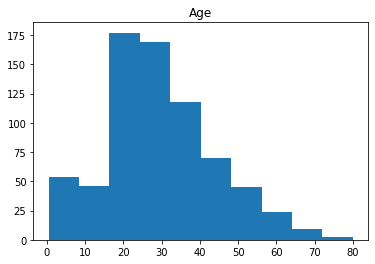

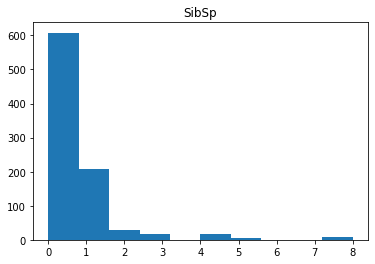

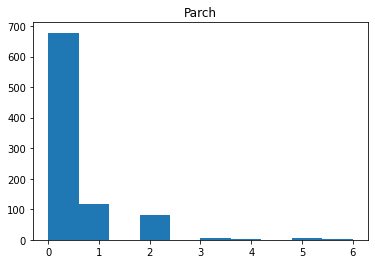

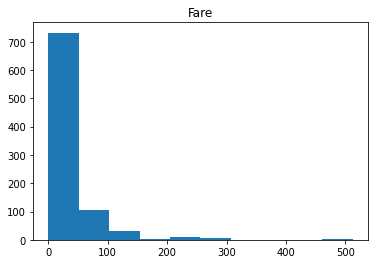

In [11]:
import matplotlib.pyplot as plt
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

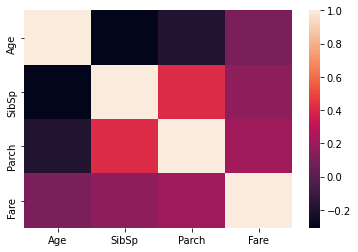

In [12]:
import seaborn as sns
print(train_num.corr())
sns.heatmap(train_num.corr())

In [13]:
pd.pivot_table(train,index='Survived',values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [14]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
train['Ticket'].value_counts()

1601         7
CA. 2343     7
347082       7
3101295      6
347088       6
            ..
A/5 21171    1
13567        1
349219       1
29105        1
C.A. 5547    1
Name: Ticket, Length: 681, dtype: int64

In [18]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
B38            1
C111           1
B50            1
E17            1
C87            1
Name: Cabin, Length: 147, dtype: int64

In [19]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
print(pd.pivot_table(train,index='Survived',columns = 'Pclass',values= 'Ticket',aggfunc='count'))
print()
print(pd.pivot_table(train, index='Survived',columns = 'Sex',values='Ticket',aggfunc = 'count'))
print()
print(pd.pivot_table(train, index='Survived',columns = 'Embarked',values='Ticket',aggfunc = 'count'))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



In [21]:
train['cabin_m'] = train.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
train['cabin_m'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_m, dtype: int64

In [22]:
pd.pivot_table(train, index='Survived',columns = 'cabin_m',values='Ticket',aggfunc = 'count')


cabin_m,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [23]:
train['cabin_L'] = train.Cabin.apply(lambda x: str(x)[0])
pd.pivot_table(train, index='Survived',columns = 'cabin_L',values='Ticket',aggfunc = 'count')


cabin_L,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [24]:
train['ticket_numeric'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letter'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)

In [25]:
train['ticket_numeric'].value_counts()
pd.pivot_table(train, index='Survived',columns = 'ticket_numeric',values='Ticket',aggfunc = 'count')


ticket_numeric,0,1
Survived,,
0,142,407
1,88,254


In [26]:
train['ticket_letter'].value_counts()
pd.pivot_table(train, index='Survived',columns = 'ticket_letter',values='Ticket',aggfunc = 'count')


ticket_letter,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [27]:
train['title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [28]:
train['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Ms                1
Don               1
the Countess      1
Mme               1
Sir               1
Lady              1
Capt              1
Jonkheer          1
Name: title, dtype: int64

In [29]:
pd.pivot_table(train, index='Survived',columns = 'title',values='Ticket',aggfunc = 'count')


title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [30]:
##### Data Preprocessing for model

In [31]:
data['cabin_m'] = train.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
data['cabin_L'] = train.Cabin.apply(lambda x: str(x)[0])
data['ticket_numeric'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
data['ticket_letter'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)
data['title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [32]:
data.Age = data.Age.fillna(train.Age.median())
data.Fare = data.Fare.fillna(train.Fare.median())
data.dropna(subset = ['Embarked'], inplace = True)

In [33]:
data.isna().sum()

PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin             1014
Embarked             0
train_test           0
cabin_m              0
cabin_L              0
ticket_numeric       0
ticket_letter        0
title                0
dtype: int64

(array([ 17.,   0.,   3., 514., 251., 261., 129.,  78.,  50.,   4.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <BarContainer object of 10 artists>)

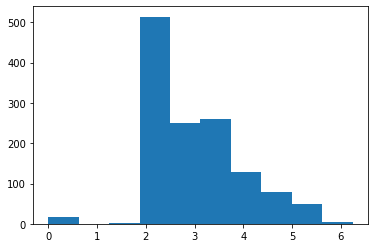

In [34]:
data['norm_Fare'] = np.log(data.Fare + 1)
plt.hist(data.norm_Fare)

In [35]:
data.Pclass = data.Pclass.astype(str)
dummies = pd.get_dummies(data[['Pclass','Sex','Age','SibSp','Parch','norm_Fare','Embarked','cabin_L','cabin_m','ticket_numeric','title','train_test']])

In [36]:
dummies

,Age,SibSp,Parch,norm_Fare,cabin_m,ticket_numeric,train_test,Pclass_1,Pclass_2,Pclass_3,...,title_Master,title_Miss,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess
0,22.0,1,0,2.110213,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,38.0,1,0,4.280593,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,26.0,0,0,2.188856,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,35.0,1,0,3.990834,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,35.0,0,0,2.202765,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,2.202765,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
414,39.0,0,0,4.699571,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
415,38.5,0,0,2.110213,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
416,28.0,0,0,2.202765,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [37]:
data.Age.value_counts()

28.00    295
24.00     47
22.00     43
21.00     41
30.00     40
        ... 
20.50      1
11.50      1
22.50      1
0.33       1
60.50      1
Name: Age, Length: 98, dtype: int64

In [38]:
X_train = dummies[dummies.train_test == 1].drop(['train_test'],axis = 1)
X_test = dummies[dummies.train_test == 0].drop(['train_test'],axis = 1)

In [39]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dummy_scale = dummies.copy()
dummy_scale[['Age','SibSp','Parch','norm_Fare']]= scaler.fit_transform(dummy_scale[['Age','SibSp','Parch','norm_Fare']])

In [40]:
X_train = dummy_scale[dummy_scale.train_test == 1].drop(['train_test'],axis = 1)
X_test = dummy_scale[dummy_scale.train_test == 0].drop(['train_test'],axis = 1)

In [41]:
y_train = data[data.train_test == 1].Survived

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [43]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv = 5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [44]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv = 5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [45]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv = 5)
print(cv)
print(cv.mean())

[0.74719101 0.76404494 0.83146067 0.75842697 0.83050847]
0.7863264140163778


In [46]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train,y_train,cv = 5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]
0.8144416936456548


In [47]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train, cv =5)
print(cv)
print(cv.mean())

[0.80898876 0.79213483 0.85393258 0.73033708 0.83615819]
0.8043102901034723


In [48]:
# enable probability estimates
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train, y_train, cv =5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [49]:
from xgboost import XGBClassifier

In [50]:
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb,X_train,y_train,cv =5)
print(cv)
print(cv.mean())

[20:26:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [51]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)],voting = 'soft')

In [52]:
cv = cross_val_score(voting_clf,X_train,y_train,cv= 5)
print(cv)
print(cv.mean())

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.8258427  0.81460674 0.82022472 0.80337079 0.85310734]
0.8234304576905986


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [53]:
cv

array([0.8258427 , 0.81460674, 0.82022472, 0.80337079, 0.85310734])

In [54]:
cv.mean()

0.8234304576905986

In [55]:
voting_clf.fit(X_train, y_train)

[20:26:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=2000)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('gnb', GaussianNB()),
                             ('svc', SVC(probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_t...
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weig

In [56]:
y_hat = voting_clf.predict(X_test)

In [57]:
y_hat=y_hat.astype(int)

In [58]:
base_submission = {'PassengerID': test.PassengerId, 'Survived':y_hat}

In [59]:
submission_1 = pd.DataFrame(data = base_submission)
submission_1.to_csv('submission.csv',index = False)

In [60]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [61]:
def clf_performance(classifier, model):
    print(model)
    print('Best Score: '+ str(classifier.best_score_))
    print('Best Score: '+ str(classifier.best_params_))

In [62]:
lr = LogisticRegression()
param_grid = {'max_iter':[2000],
              'penalty': ['l1','l2'],
              'C': np.logspace(-4,4,20),
              'solver':['liblinear']
             }
clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5,verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.4s


Logistic Regression
Best Score: 0.8279375357074843
Best Score: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


In [63]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
             'weights':['uniform','distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'p':[1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid,cv =5, verbose= True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.7s


KNN
Best Score: 0.8279375357074843
Best Score: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    2.3s finished


In [67]:
rf = RandomForestClassifier(random_state = 1)
param_grid = {'n_estimators': [400,450,500,550,600,650,700,750,800,850,900],
              'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 792 candidates, totalling 3960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-1)]: Done 3960 out of 3960 | elapsed: 38.7min finished


Random Forest
Best Score: 0.8346791087411922
Best Score: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}


<AxesSubplot:>

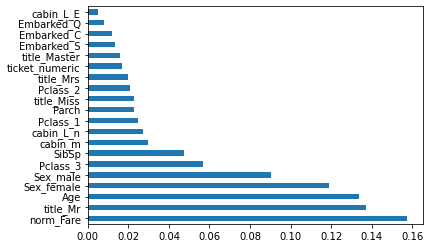

In [70]:
best_rf = best_clf_rf.best_estimator_.fit(X_train,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [79]:
xgb = XGBClassifier(tree_method='gpu_hist',random_state = 1)

param_grid = {
    'n_estimators': [400,450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 4, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   17.3s


[03:03:19] WARNING: ../src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1


[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:   25.5s finished
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoostError: [03:03:19] ../src/gbm/gbtree.cc:548: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.
Stack trace:
  [bt] (0) /opt/conda/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x9133f) [0x7fb85d10433f]
  [bt] (1) /opt/conda/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x18602d) [0x7fb85d1f902d]
  [bt] (2) /opt/conda/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x186a6e) [0x7fb85d1f9a6e]
  [bt] (3) /opt/conda/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x1b940c) [0x7fb85d22c40c]
  [bt] (4) /opt/conda/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x1b9a5e) [0x7fb85d22ca5e]
  [bt] (5) /opt/conda/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x50) [0x7fb85d0f3ed0]
  [bt] (6) /opt/conda/lib/python3.7/lib-dynload/../../libffi.so.7(+0x69dd) [0x7fb8e7c6a9dd]
  [bt] (7) /opt/conda/lib/python3.7/lib-dynload/../../libffi.so.7(+0x6067) [0x7fb8e7c6a067]
  [bt] (8) /opt/conda/lib/python3.7/lib-dynload/_ctypes.cpython-37m-x86_64-linux-gnu.so(_ctypes_callproc+0x2f4) [0x7fb8e7c80794]

